In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from pandeia.engine.perform_calculation import perform_calculation
import json

Load in the .json file setting up most of the calculation.

In [2]:
jf = 'miri_tso_ima_setup.json'
with open(jf) as f:
    iminp = json.load(f)
    

Basic exposure settings for MIRI imaging:

In [3]:
px_scale = 0.11


ngrp = 20
nint = 1
nexp = 1

bgr = 'high'

rd = 'fast'
subarr = 'sub64'
filt = ['f560w', 'f770w', 'f1000w', 'f1130w', 'f1280w', 'f1500w', 'f1800w', 'f2100w', 'f2550w']
filt_fwhm = [0.22, 0.25, 0.32, 0.36, 0.41, 0.48, 0.58, 0.67, 0.82]
filt_grps = [20, 20, 20, 20, 20, 20, 50, 100, 500]


Initialise the aperture extraction **radii** we want to test:

In [4]:
ap_x = [2.0, 3.0, 5.0, 7.0, 9.0, 11.0, 13.0]
ap_r = [(i/2.)*px_scale for i in ap_x]


Now the code to perform the calculation for filter & aperture combos:

SNRs for filter f560w = [ 367.1676936   419.87316087  445.72203555  477.84974162  481.88060814
  475.97235737  467.97421037]
SNRs for filter f770w = [ 374.67482003  445.15748143  491.25895308  503.66494014  520.81648913
  515.27837315  495.05854737]
SNRs for filter f1000w = [ 234.28330417  284.17211849  346.59948799  345.70586545  335.69794716
  328.73762519  310.30601387]
SNRs for filter f1130w = [ 103.34806539  125.53999345  157.435344    154.34134006  136.87963784
  122.48801398  110.6777368 ]
SNRs for filter f1280w = [ 152.71836636  186.890193    246.10068854  255.72629908  234.80338005
  209.15928572  189.34643595]
SNRs for filter f1500w = [ 113.88557401  139.56947556  189.1772288   201.92381389  185.27347496
  157.06010787  132.52403513]
SNRs for filter f1800w = [ 102.50998392  125.57137933  173.63403527  190.06857299  177.87194301
  149.52634573  119.32986485]
SNRs for filter f2100w = [  83.1490595   101.25958706  139.06281119  151.85200569  142.99476823
  121.73246641   97.5308

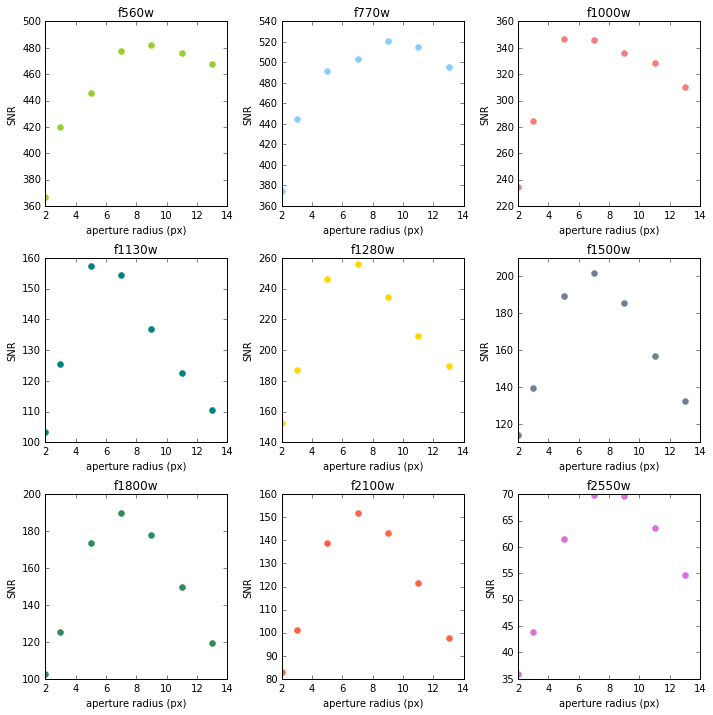

In [7]:
snfig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=[10,10])
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
nfilt = len(filt)
nap = len(ap_r)
sn = np.zeros(nap)

iminp['background'] = 'high'
c = ['yellowgreen', 'lightskyblue', 'lightcoral', 'teal', 'gold', 'slategray', 'seagreen', 'tomato', 'orchid']

for f, grps, ax, col in zip(filt, filt_grps, axes, c):
    iminp['configuration']['instrument']['filter'] = f
    iminp['configuration']['detector']['ngroup'] = grps
    
    for i,r in enumerate(ap_r):
        iminp['strategy']['aperture_size'] = r
        out = perform_calculation(iminp)
        sn[i] = out['scalar']['sn']
        
    print 'SNRs for filter {0} = {1}'.format(f, sn)
    ax.plot(ap_x, sn, 'o', mfc=col, mec=col)
    ax.set_title(f)
    ax.set_xlabel('aperture radius (px)')
    ax.set_ylabel('SNR')
    
snfig.tight_layout()
    
    
    
    
#print '{0}:  SNR = {1:2f}'.format(iminp['configuration']['instrument']['filter'], out['scalar']['sn'])

In [8]:
plt.savefig('ima_photometry_plots.png')